## EDA And Feature Engineering Flight Price Prediction
### FEATURES
#### The various features of the cleaned dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10) Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) Price: Target variable stores information of the ticket price.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [2]:
df=pd.read_excel("flight_price.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [5]:
df['Day']=df["Date_of_Journey"].str.split('/').str[0].astype(int)
df['Month']=df["Date_of_Journey"].str.split('/').str[1].astype(int)
df['Year']=df["Date_of_Journey"].str.split('/').str[2].astype(int)

In [6]:
df["Dep_Time"].str.split(" ").str[0],df["Dep_Time"].str.split(" ").str[1]

(0        22:20
 1        05:50
 2        09:25
 3        18:05
 4        16:50
          ...  
 10678    19:55
 10679    20:45
 10680    08:20
 10681    11:30
 10682    10:55
 Name: Dep_Time, Length: 10683, dtype: object,
 0       NaN
 1       NaN
 2       NaN
 3       NaN
 4       NaN
          ..
 10678   NaN
 10679   NaN
 10680   NaN
 10681   NaN
 10682   NaN
 Name: Dep_Time, Length: 10683, dtype: float64)

In [7]:
df["Dep_Time_in_hours"]=df["Dep_Time"].str.split(" ").str[0].str.split(":").str[0].astype(int)
df["Dep_Time_in_minutes"]=df["Dep_Time"].str.split(" ").str[0].str.split(":").str[0].astype(int)

In [8]:
df['Arrival_Time'].str.split(' ').str[0]

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
         ...  
10678    22:25
10679    23:20
10680    11:20
10681    14:10
10682    19:15
Name: Arrival_Time, Length: 10683, dtype: object

In [10]:
df['Arrival_hours']=df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0].astype(int)
df['Arrival_min']=df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10683 non-null  object
 1   Date_of_Journey      10683 non-null  object
 2   Source               10683 non-null  object
 3   Destination          10683 non-null  object
 4   Route                10682 non-null  object
 5   Dep_Time             10683 non-null  object
 6   Arrival_Time         10683 non-null  object
 7   Duration             10683 non-null  object
 8   Total_Stops          10682 non-null  object
 9   Additional_Info      10683 non-null  object
 10  Price                10683 non-null  int64 
 11  Day                  10683 non-null  int64 
 12  Month                10683 non-null  int64 
 13  Year                 10683 non-null  int64 
 14  Dep_Time_in_hours    10683 non-null  int64 
 15  Dep_Time_in_minutes  10683 non-null  int64 
 16  Arri

In [49]:
df["Duration_Time_in_hours"]=df["Duration"].str.split(" ").str[0].str.split("h").str[0].replace("5m",0).astype(int)
df["Duration_Time_in_minutes"]=df["Duration"].str.split(" ").str[1].str.split("m").str[0].replace(np.nan,0).astype(int)

In [50]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [60]:
df['Total_Stops'].mode()

0    1 stop
Name: Total_Stops, dtype: object

In [62]:
df["Total_Stops"]=df["Total_Stops"].map({"non-stop":0,"'1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4}).replace(np.nan,1)

In [63]:
df['Total_Stops'].isnull().sum()

0

In [64]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [65]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [66]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [70]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [75]:
encoder=OneHotEncoder()
x=encoder.fit_transform(df[["Airline","Source","Destination","Additional_Info"]]).toarray()

In [77]:
df1=pd.DataFrame(x,columns=encoder.get_feature_names_out())

In [78]:
df.drop("Date_of_Journey",axis=1,inplace=True)
df.drop("Dep_Time",axis=1,inplace=True)
df.drop('Arrival_Time',axis=1,inplace=True)
df.drop("Duration",axis=1,inplace=True)

In [83]:
df.drop("Route",axis=1,inplace=True)

In [79]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_hours,Arrival_min,Duration_Time_in_hours,Duration_Time_in_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,0.0,No info,3897,24,3,2019,22,22,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2.0,No info,7662,1,5,2019,5,5,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2.0,No info,13882,9,6,2019,9,9,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1.0,No info,6218,12,5,2019,18,18,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1.0,No info,13302,1,3,2019,16,16,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,0.0,No info,4107,9,4,2019,19,19,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,0.0,No info,4145,27,4,2019,20,20,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,0.0,No info,7229,27,4,2019,8,8,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,0.0,No info,12648,1,3,2019,11,11,14,10,2,40


In [92]:
data=pd.concat([df,df1],axis=1)
data

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Time_in_hours,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,IndiGo,Banglore,New Delhi,0.0,No info,3897,24,3,2019,22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Air India,Kolkata,Banglore,2.0,No info,7662,1,5,2019,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Jet Airways,Delhi,Cochin,2.0,No info,13882,9,6,2019,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,IndiGo,Kolkata,Banglore,1.0,No info,6218,12,5,2019,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,IndiGo,Banglore,New Delhi,1.0,No info,13302,1,3,2019,16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0.0,No info,4107,9,4,2019,19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10679,Air India,Kolkata,Banglore,0.0,No info,4145,27,4,2019,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10680,Jet Airways,Banglore,Delhi,0.0,No info,7229,27,4,2019,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10681,Vistara,Banglore,New Delhi,0.0,No info,12648,1,3,2019,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


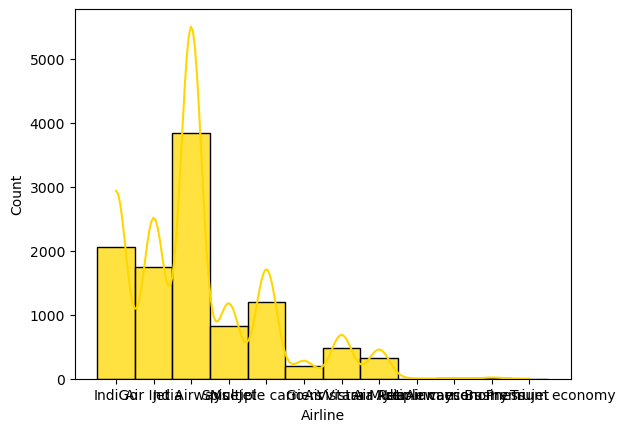

In [108]:
sns.histplot(data,x="Airline",bins=30,kde=True,color="gold",alpha=0.75)
plt.show()

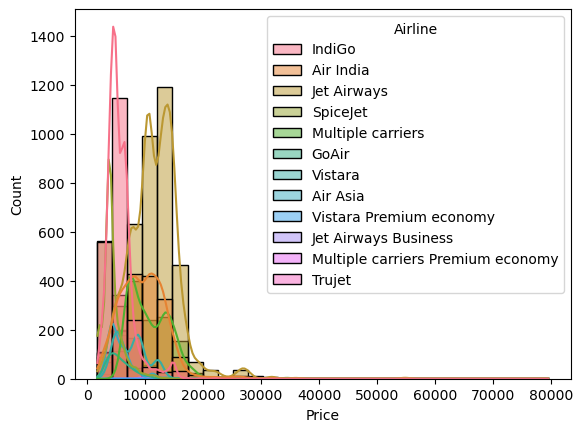

In [112]:
sns.histplot(data,x="Price",bins=30,kde=True,hue="Airline")
plt.show()

In [ ]:
sns.histplot(data,x="Price",bins=30,kde=True,hue="Airline")

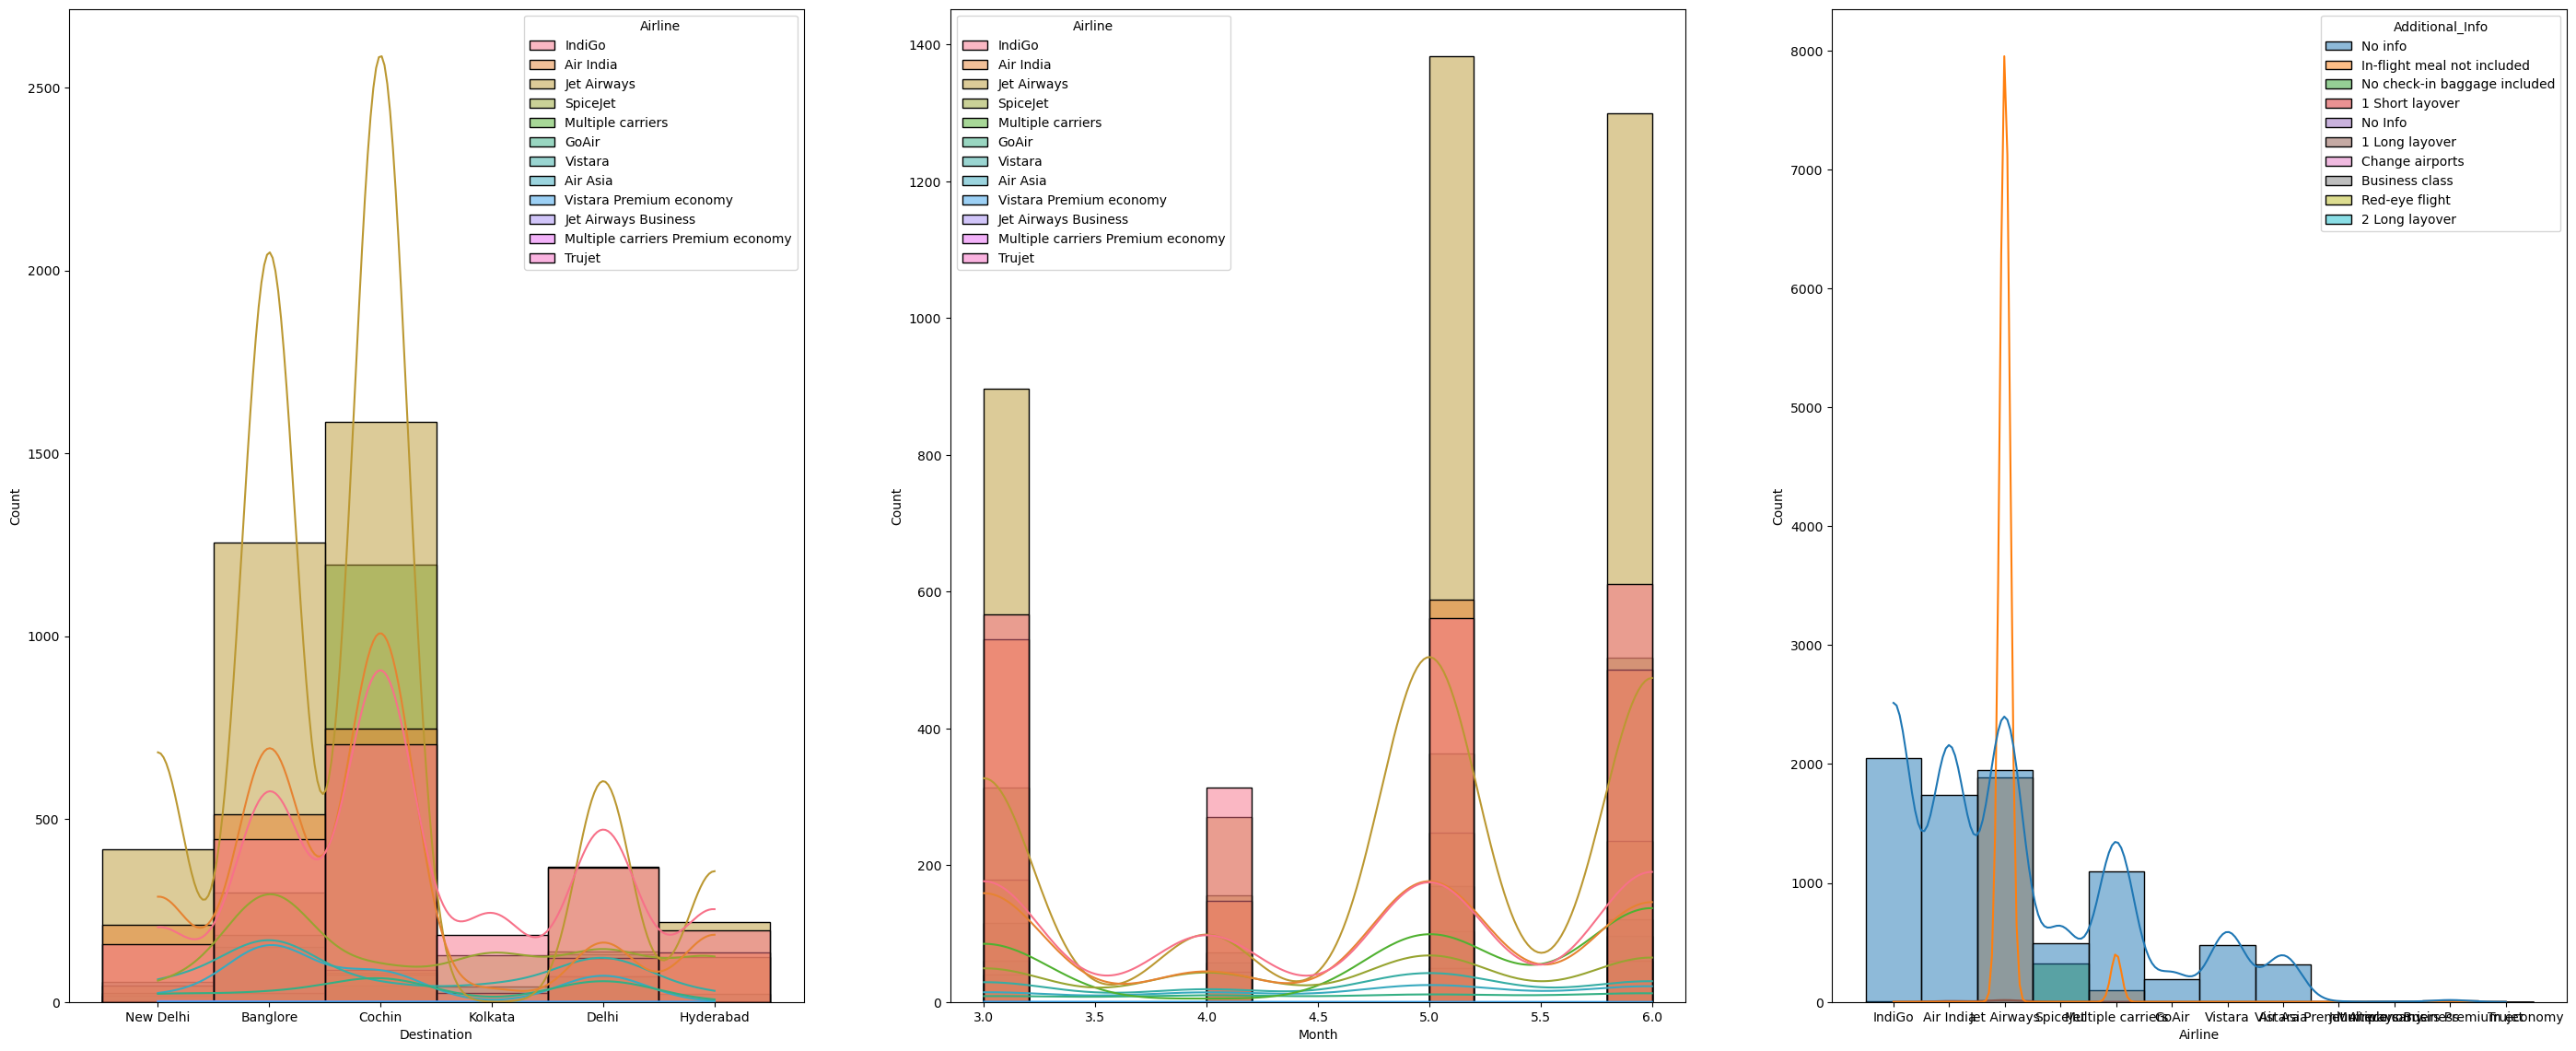

In [114]:
plt.subplots(1,3,figsize=(35,14))
plt.subplot(131)
sns.histplot(data,x='Destination',kde="True",hue="Airline")
plt.subplot(132)
sns.histplot(data ,x="Month",kde="Ture",hue="Airline")
plt.subplot(133)
sns.histplot(data ,x='Airline',kde="True",hue="Additional_Info")
plt.show()